# Ejercicio con Dataset mayoristas de Kaggle

In [5]:
# cargar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Abrir csv de wholesale customers data desde la carpeta data
data = pd.read_csv('wholesale_customers_data.csv')
data



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


<Axes: xlabel='Milk', ylabel='Grocery'>

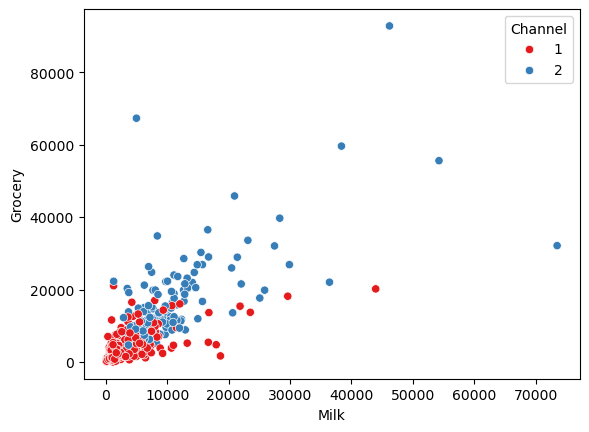

In [34]:
# Visualizar los datos originales
sns.scatterplot(x=data['Milk'], y=data['Grocery'], hue=data['Channel'], palette='Set1')


In [11]:
# Noramalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [20]:
data_scaled_pd = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled_pd['Channel'] = data['Channel']
data_scaled_pd

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,1,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,1,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,2,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,1,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


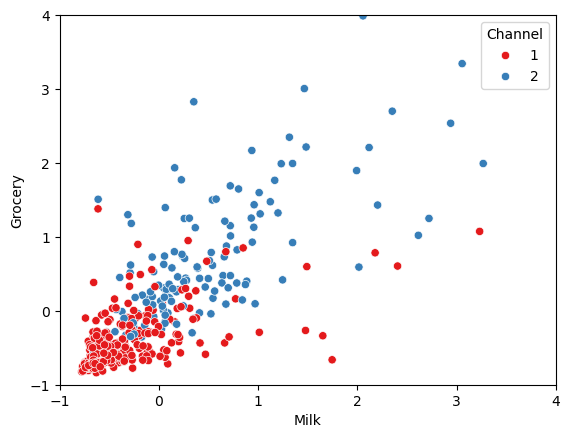

In [37]:
# Visualizamos con los datos normalizados
sns.scatterplot(x=data_scaled_pd['Milk'], y=data_scaled_pd['Grocery'], hue=data_scaled_pd['Channel'], palette='Set1')

# Hacer zoom en la escala de los ejes, eliminand los outliers de la visualización
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.show()

## Compararmos Agglomerative Clustering y Kmeans

In [42]:
# Aplicamos  Agglomerative Clustering y Kmeans
from sklearn.cluster import AgglomerativeClustering, KMeans
agglo = AgglomerativeClustering(n_clusters=2)
kmeans = KMeans(n_clusters=2, random_state=42)

# eliminamos la columna 'Channel' para hacer clustering
data_scaled_no_channel = data_scaled_pd.drop('Channel', axis=1)

# ajustamos los modelos y predecimos las etiquetas
agglo_labels = agglo.fit_predict(data_scaled_no_channel)
kmeans_labels = kmeans.fit_predict(data_scaled_no_channel)

data_scaled_pd['Agglo_Labels'] = agglo_labels
data_scaled_pd['KMeans_Labels'] = kmeans_labels
data_scaled_pd

c:\Users\ddiaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Agglo_Labels,KMeans_Labels
0,2,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1,0
1,2,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1,0
2,2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1,0
3,1,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,0
4,2,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1,0
...,...,...,...,...,...,...,...,...,...,...
435,1,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1,0
436,1,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1,0
437,2,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0,0
438,1,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1,0


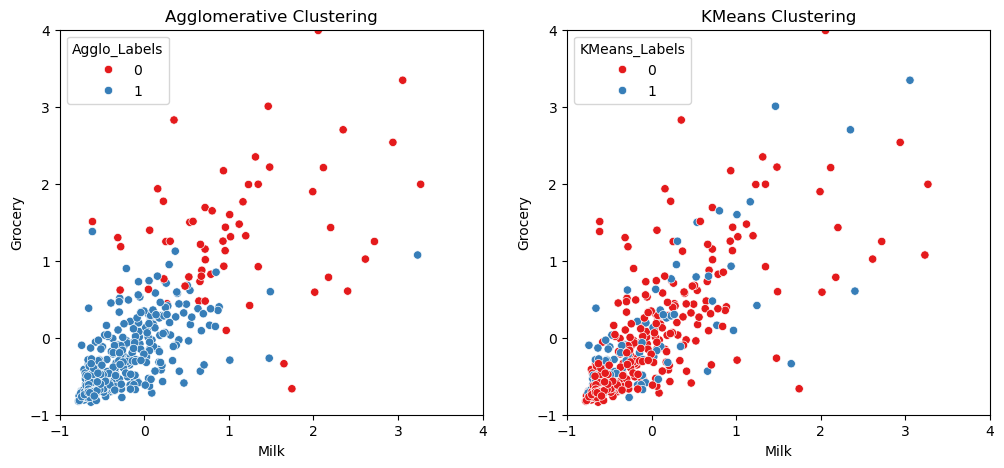

In [45]:
# Visualizamos y comparamos los resultados de ambos algoritmos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=data_scaled_pd['Milk'], y=data_scaled_pd['Grocery'], hue=data_scaled_pd['Agglo_Labels'], palette='Set1', ax=axes[0])
# cambiar color puntos para que coincida con el gráfico de la izquierda
sns.scatterplot(x=data_scaled_pd['Milk'], y=data_scaled_pd['Grocery'], hue=data_scaled_pd['KMeans_Labels'], palette='Set1', ax=axes[1])
axes[0].set_title('Agglomerative Clustering')
axes[1].set_title('KMeans Clustering')
# establecemos los mismos límites en ambos gráficos
for ax in axes:
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
plt.show()

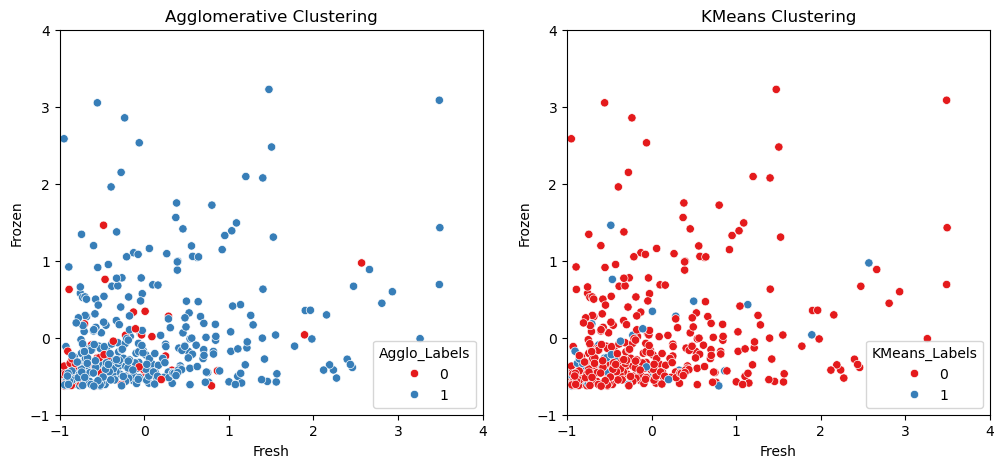

In [41]:
# Visualizamos y comparamos los resultados de ambos algoritmos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=data_scaled_pd['Fresh'], y=data_scaled_pd['Frozen'], hue=data_scaled_pd['Agglo_Labels'], palette='Set1', ax=axes[0])
sns.scatterplot(x=data_scaled_pd['Fresh'], y=data_scaled_pd['Frozen'], hue=data_scaled_pd['KMeans_Labels'], palette='Set1', ax=axes[1])
axes[0].set_title('Agglomerative Clustering')
axes[1].set_title('KMeans Clustering')
# establecemos los mismos límites en ambos gráficos
for ax in axes:
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
plt.show()